In [1]:
                                                    #DATA PRE-PROCESSING
import numpy as np
import pandas as pd
# Load the dataset
df = pd.read_csv("./Documents/breast-cancer.csv")

print("Dataset shape:", df.shape)

# Display the head of the dataframe to understand its structure
print(df.head())

# Check data types and missing values
print("\
Data types and non-null counts:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates:', duplicates)

# Check data types
data_types = df.dtypes
print(data_types)

Dataset shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
df = pd.read_csv("./Documents/breast-cancer.csv")

# Encode the categorical variable 'diagnosis'
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['id', 'diagnosis']))

# Create a new DataFrame with scaled features and the encoded diagnosis
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[2:])
scaled_df['diagnosis'] = df['diagnosis']

# Display the head of the scaled DataFrame
print(scaled_df.head())
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[2:])
scaled_df['diagnosis'] = df['diagnosis']
# Check for outliers in the scaled numerical features
outliers = scaled_df.drop(columns=['diagnosis']).apply(detect_outliers_iqr)

# Count the number of outliers in each feature
outlier_counts = outliers.sum()
print(outlier_counts)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

In [7]:
 #Remove outliers based on the IQR method
for column in scaled_df.columns[:-1]:
    Q1 = scaled_df[column].quantile(0.25)
    Q3 = scaled_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    scaled_df = scaled_df[(scaled_df[column] >= lower_bound) & (scaled_df[column] <= upper_bound)]

# Display the shape of the cleaned DataFrame
cleaned_shape = scaled_df.shape
print('Shape of cleaned DataFrame:',cleaned_shape)

Shape of cleaned DataFrame: (277, 31)


In [21]:
                                          #VISUALIZATIONS AND KEY EDA INSIGHTS 
df = pd.read_csv("./Documents/breast-cancer.csv")
# Summary statistics
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064   

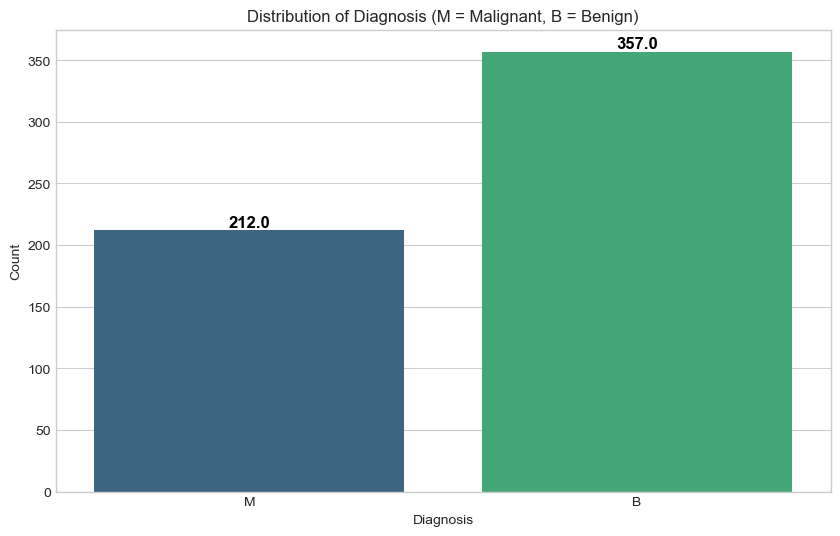

Diagnosis distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage:
diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


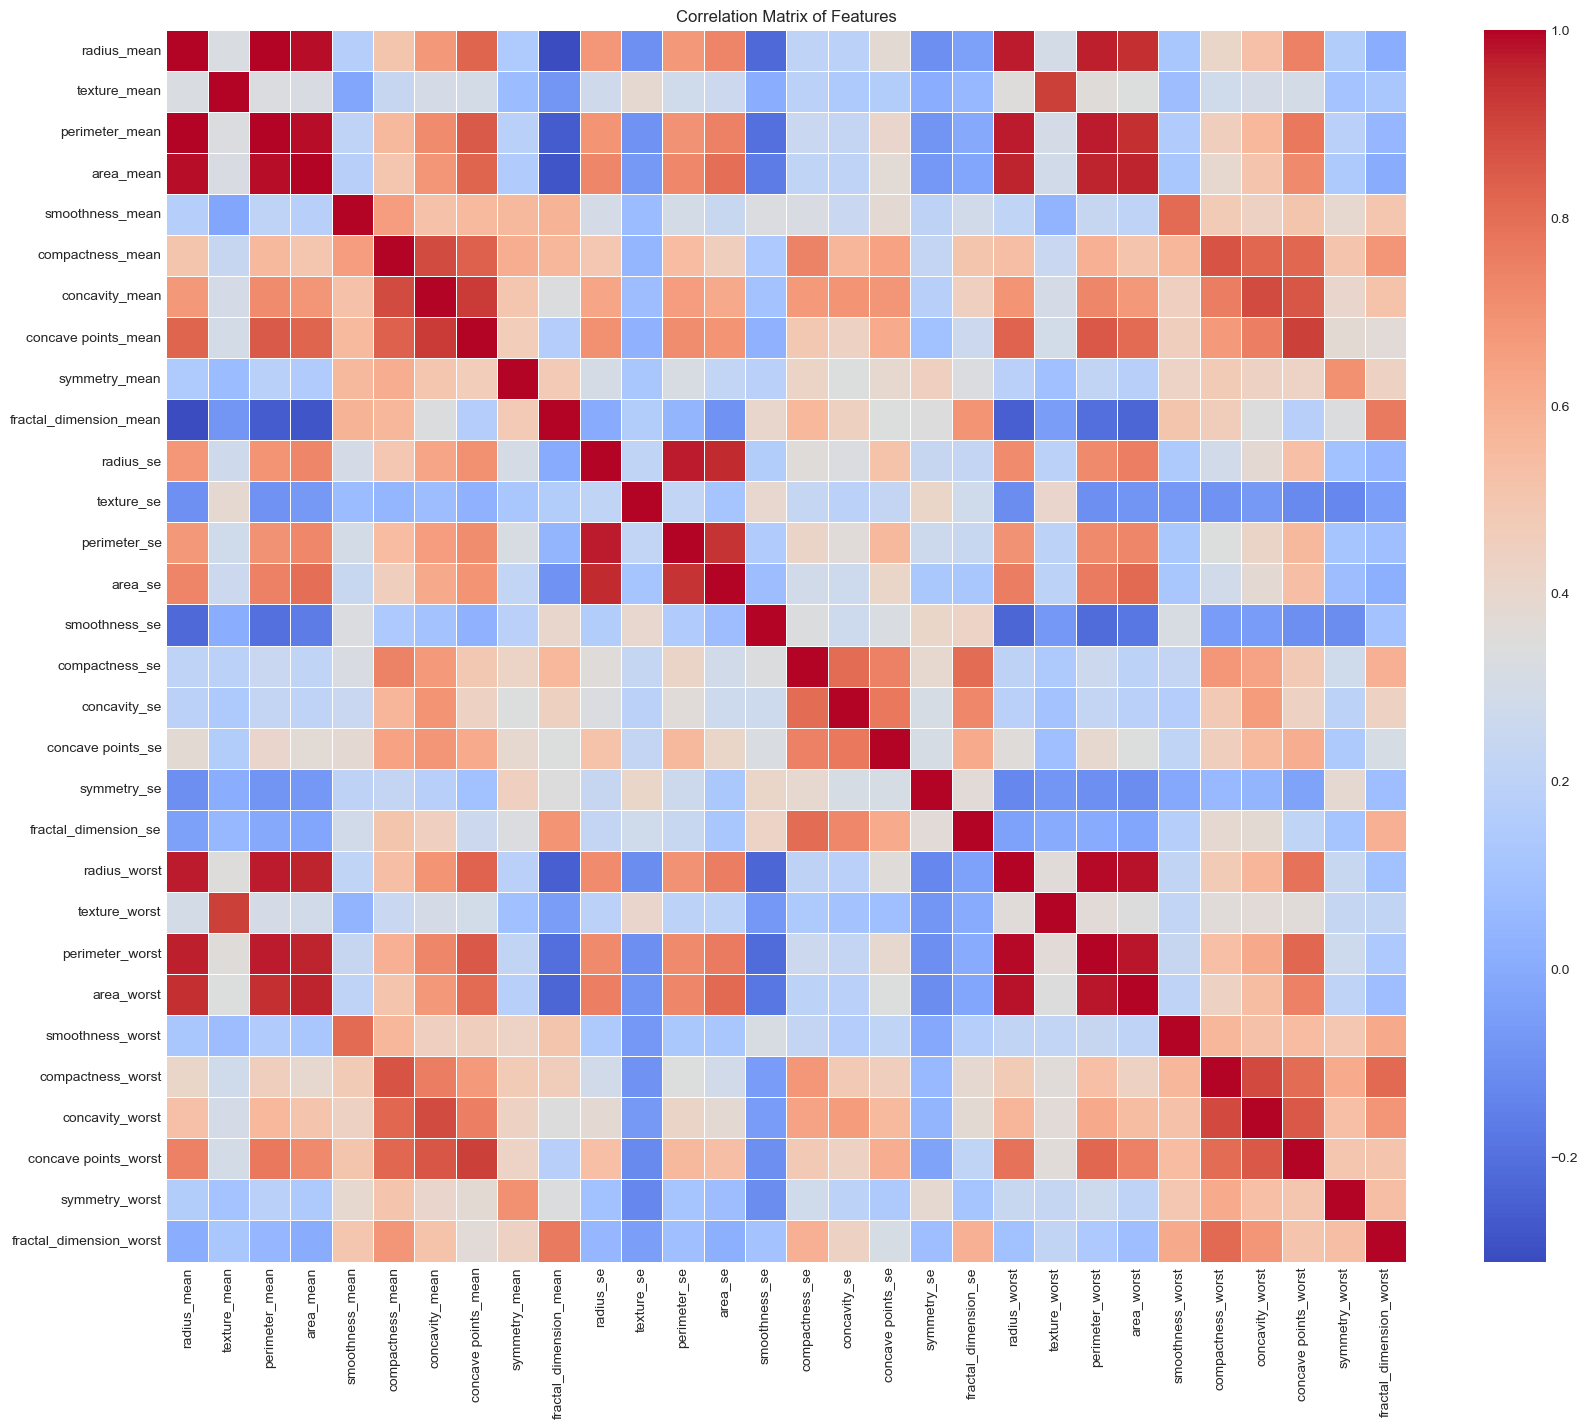

Correlation matrix created. Highly correlated features can be observed in the heatmap.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Count plot for diagnosis with hue set explicitly
ax = sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='viridis', legend=False)
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

# Calculate the percentage of each class
diagnosis_counts = df['diagnosis'].value_counts()
print("Diagnosis distribution:")
print(diagnosis_counts)
print("\nPercentage:")
print(diagnosis_counts / len(df) * 100)

# Create a correlation matrix for the numerical features
# First, drop the non-numerical columns
df_numeric = df.drop(['id', 'diagnosis'], axis=1)

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("Correlation matrix created. Highly correlated features can be observed in the heatmap.")

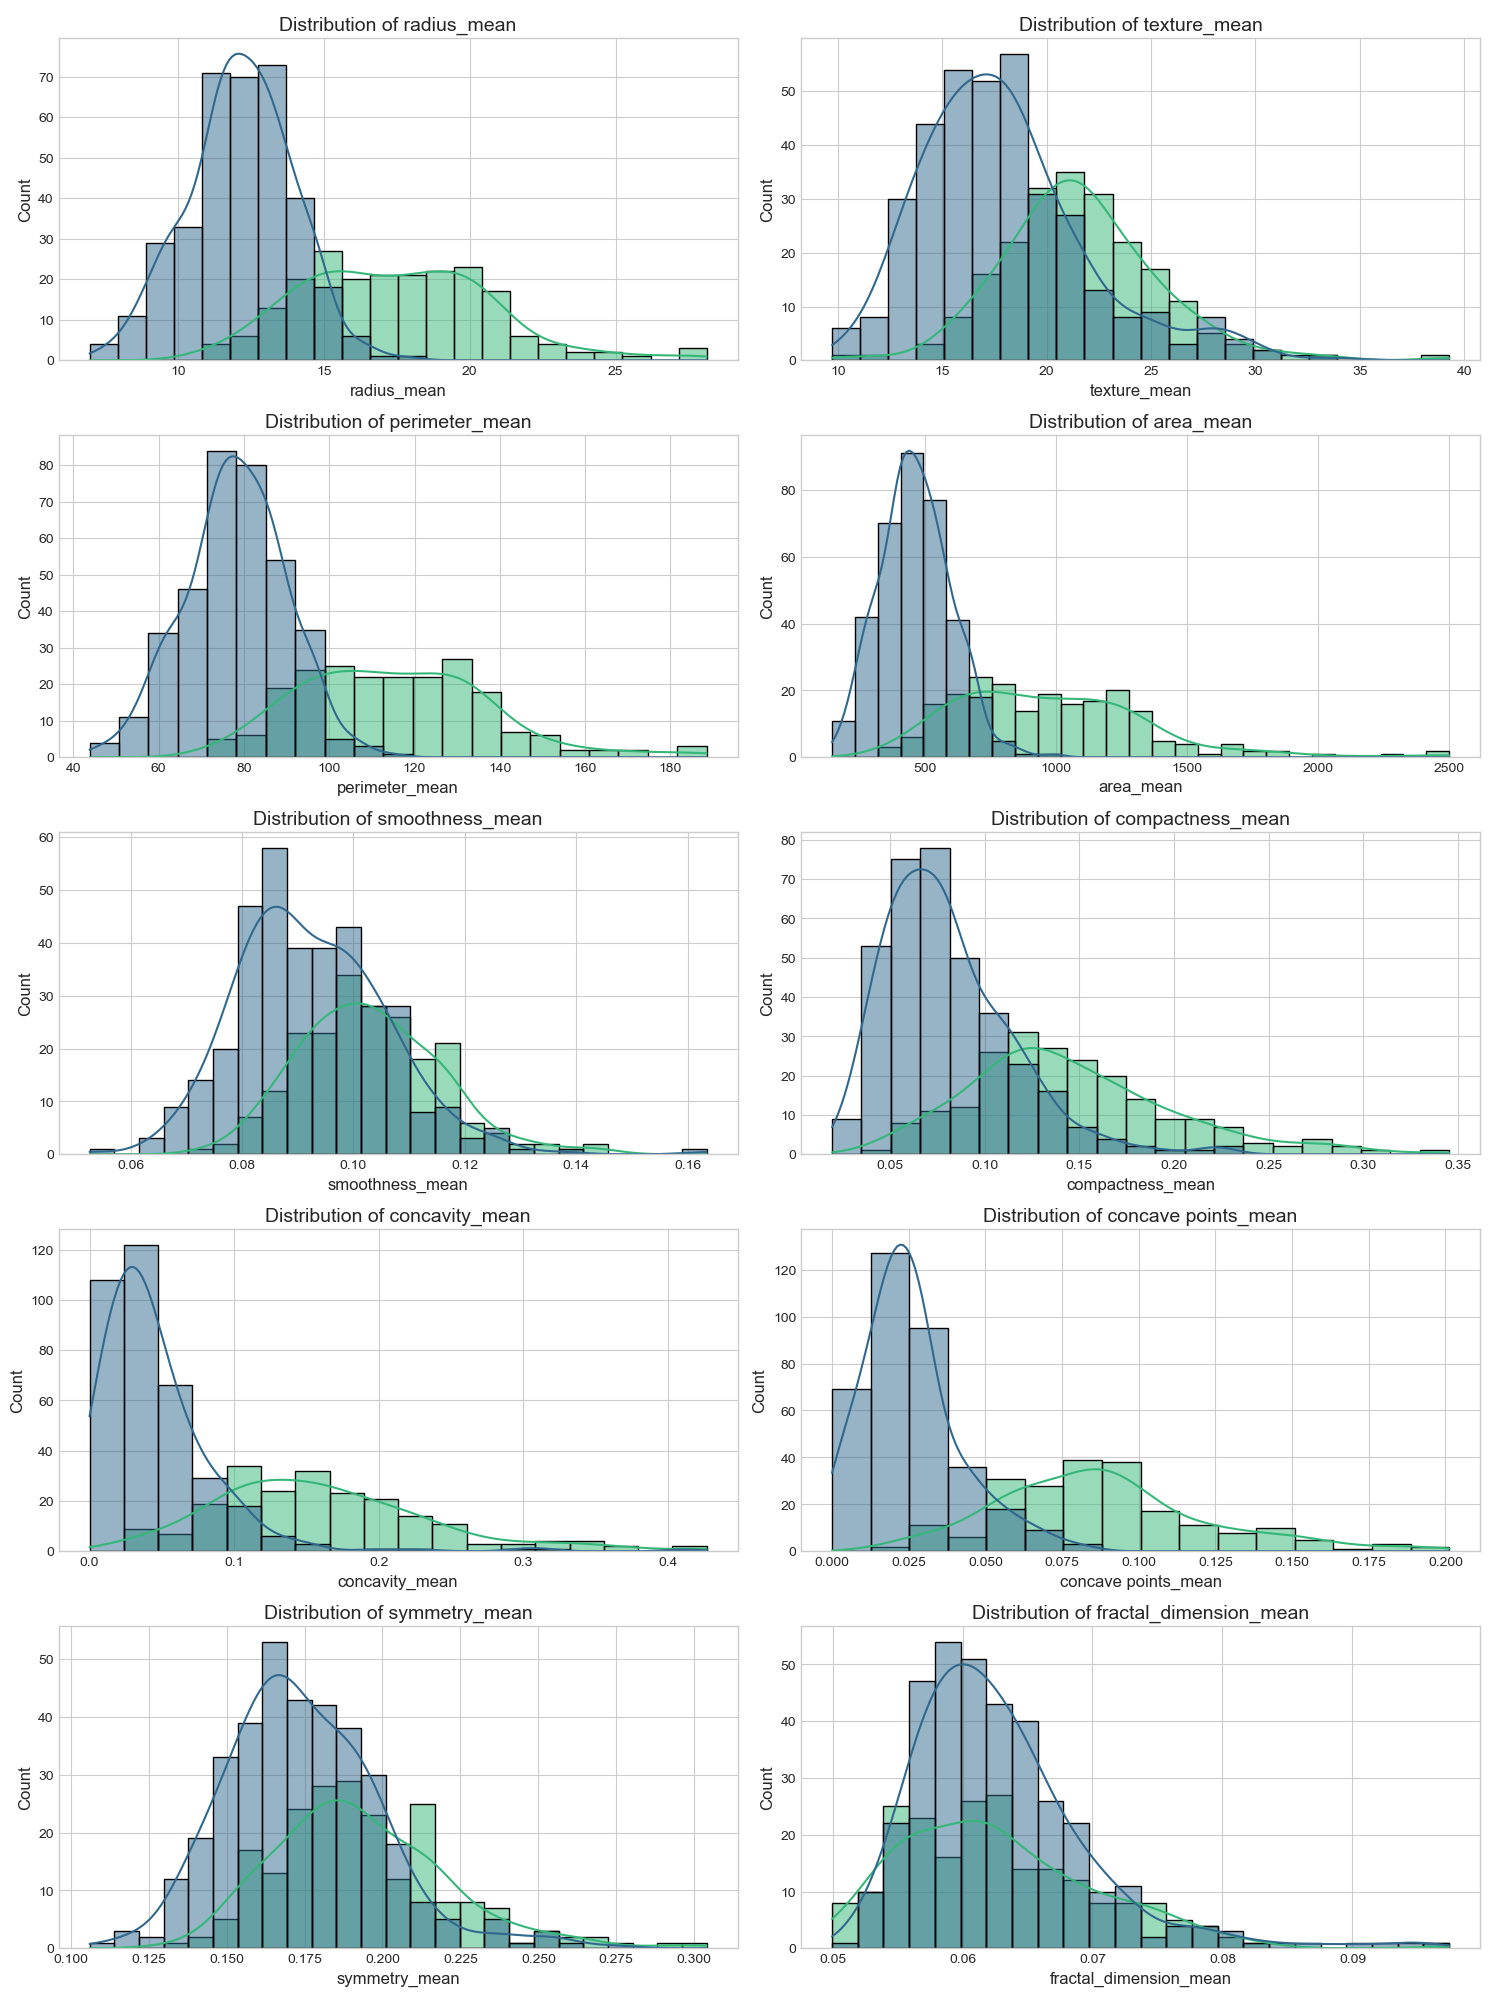

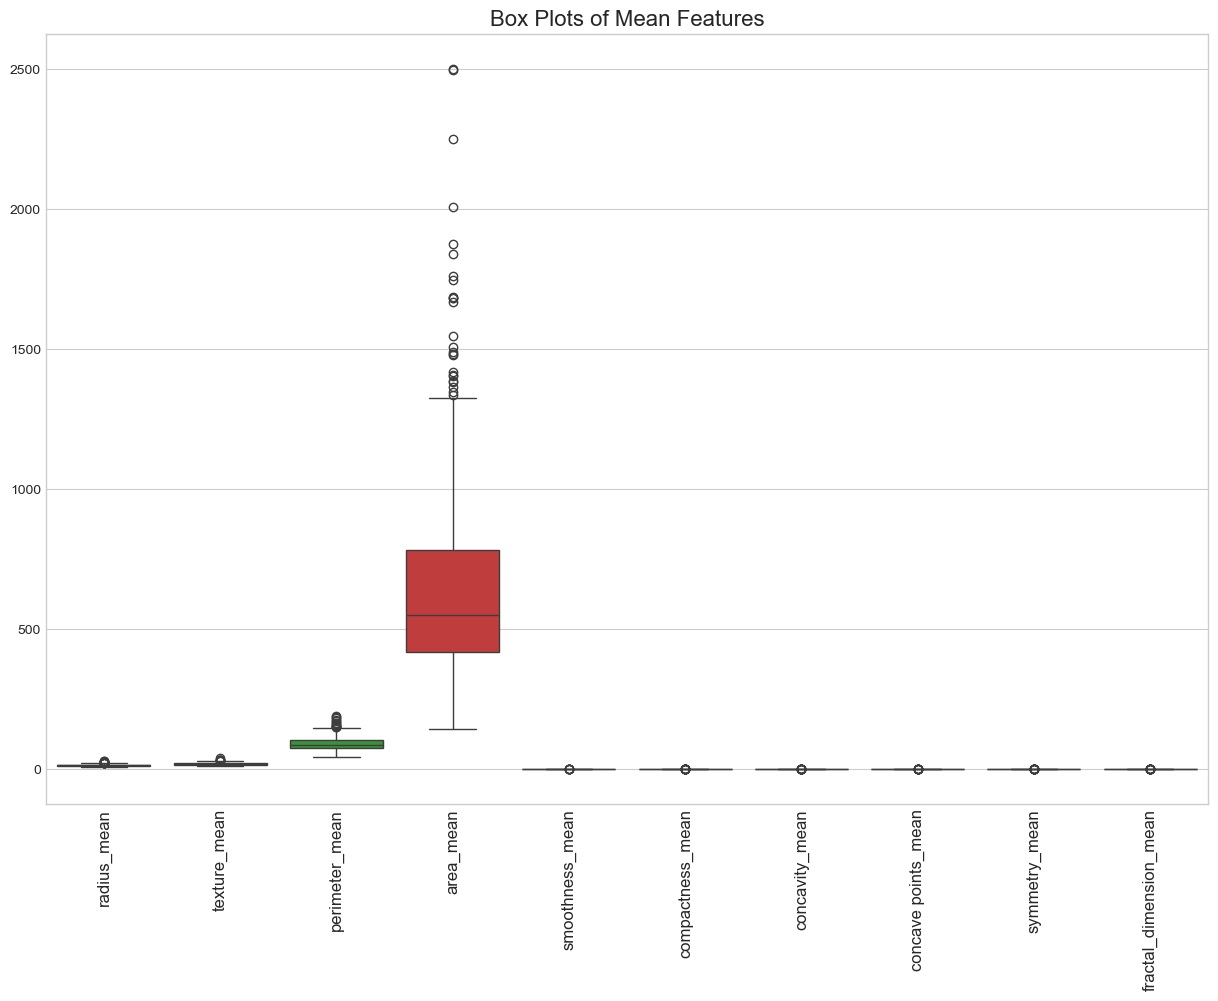

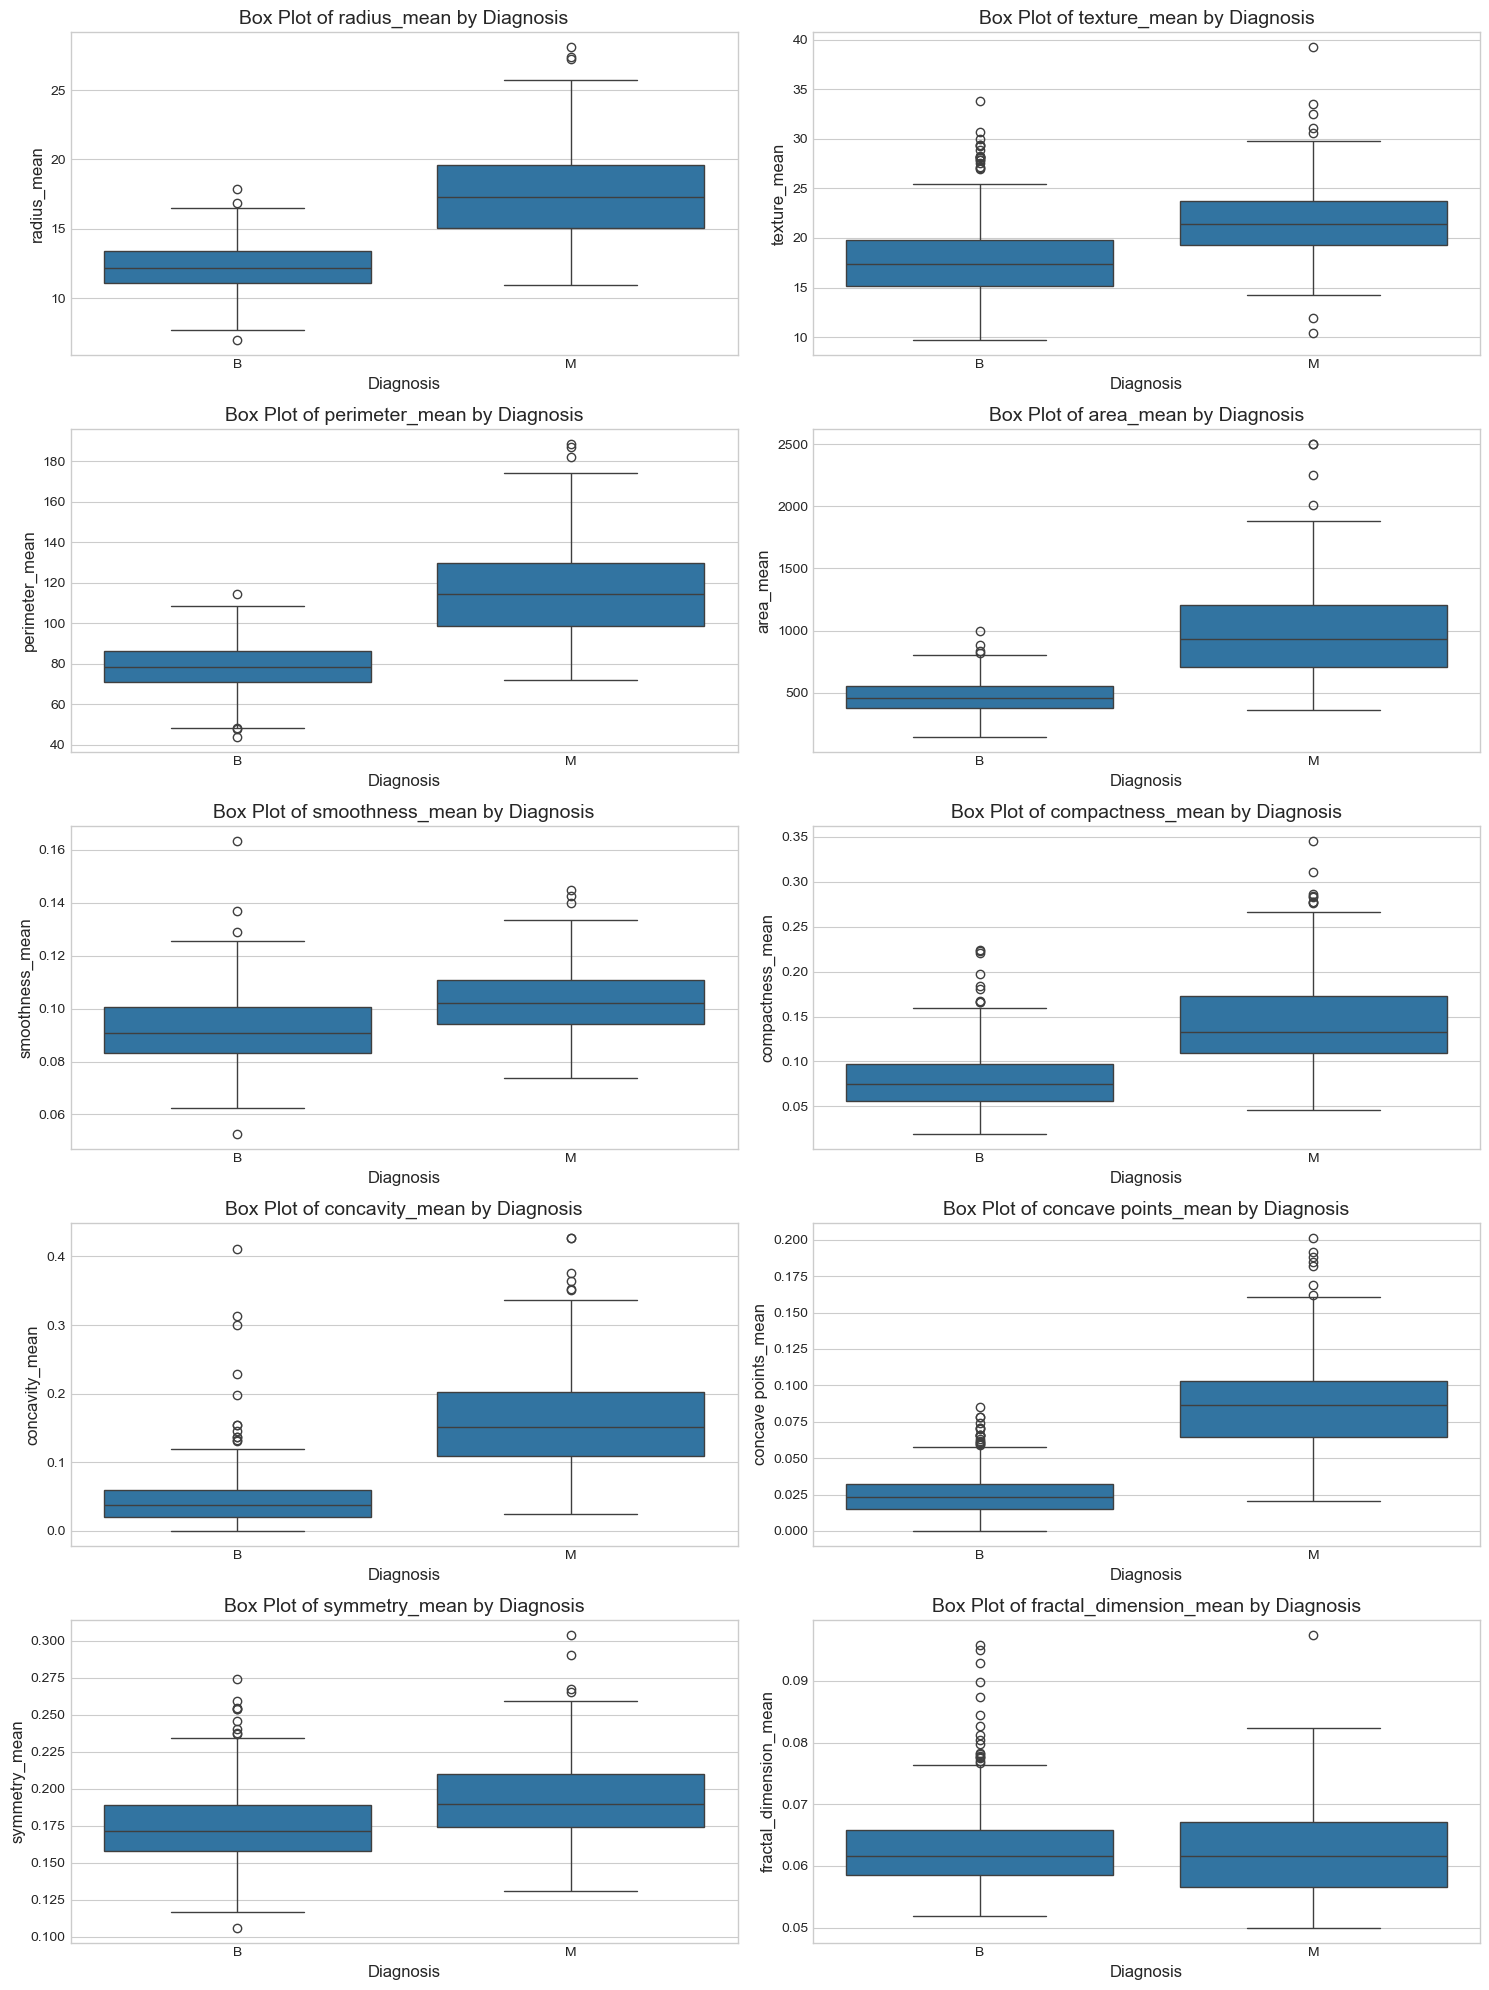

✅ Histograms and box plots created successfully!


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Ensure 'diagnosis' is categorical
df['diagnosis'] = df['diagnosis'].astype('category')

# Define the mean features for analysis
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

### 1️⃣ HISTOGRAMS (Feature Distributions by Diagnosis) ###
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    sns.histplot(data=df, x=feature, hue='diagnosis', hue_order=['B', 'M'], kde=True, 
                 ax=axes[i], hue_norm=None, legend=False, palette='viridis')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Benign (B)', 'Malignant (M)'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

### 2️⃣ BOX PLOTS (Overall Feature Distributions) ###
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[mean_features])
plt.title('Box Plots of Mean Features', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### 3️⃣ BOX PLOTS (Feature Distributions by Diagnosis) ###
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Diagnosis', fontsize=14)
    axes[i].set_xlabel('Diagnosis', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

print("✅ Histograms and box plots created successfully!")

<Figure size 1200x1000 with 0 Axes>

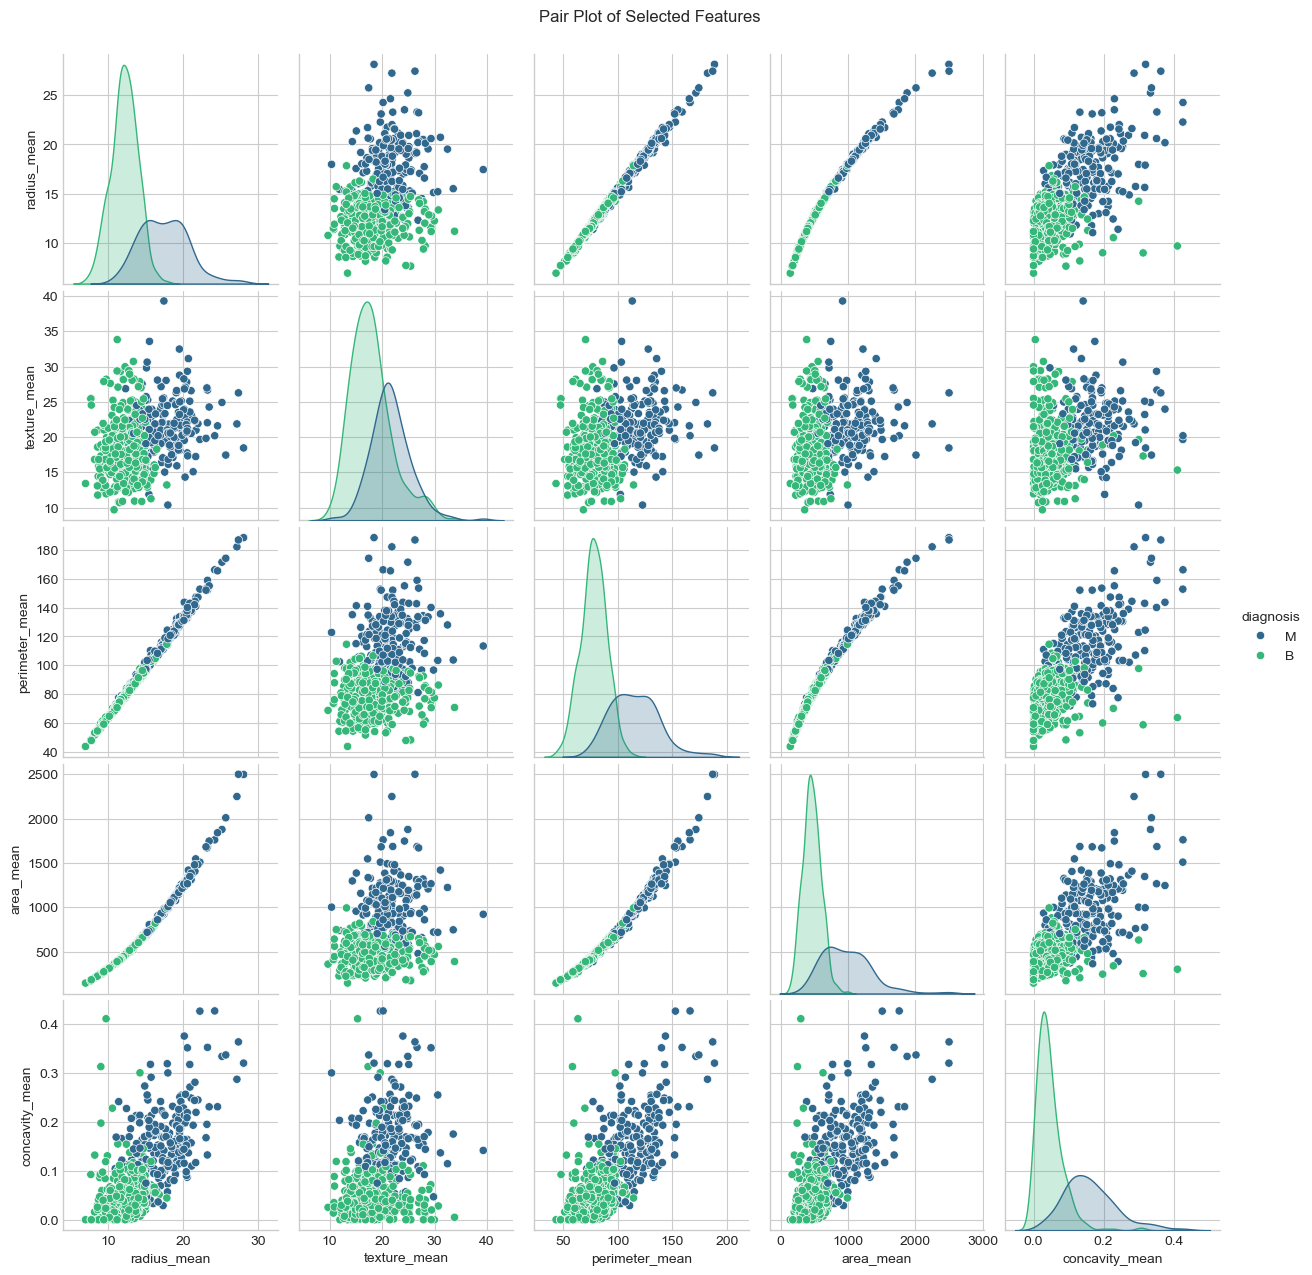

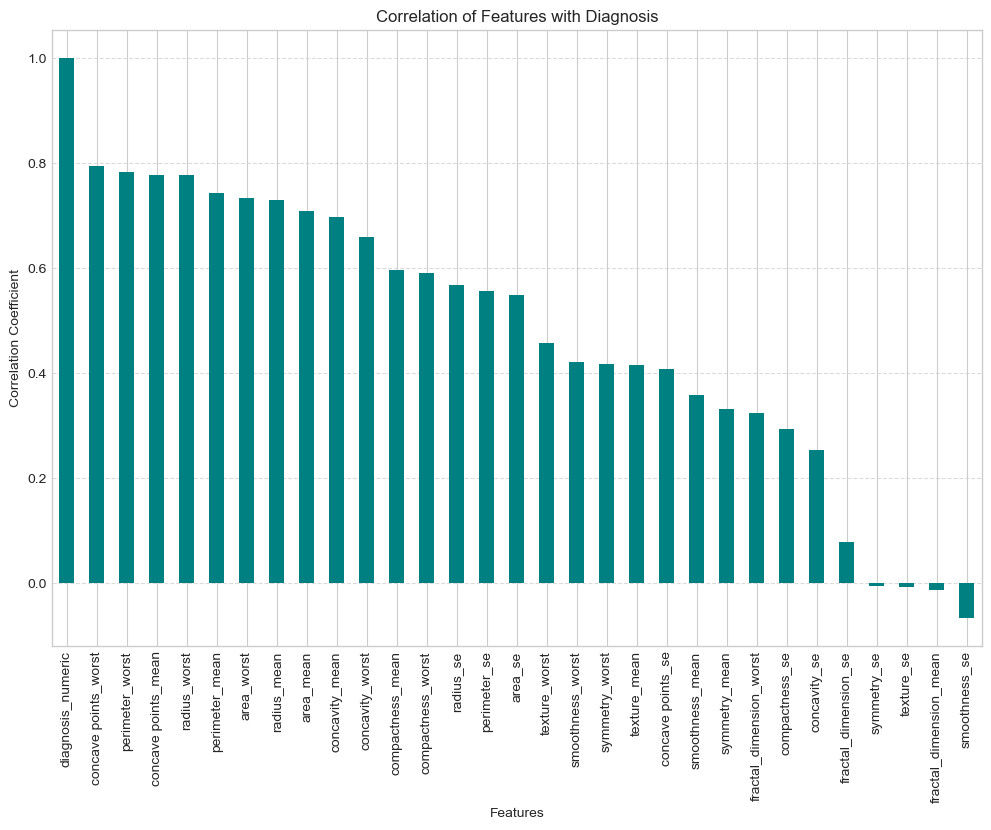

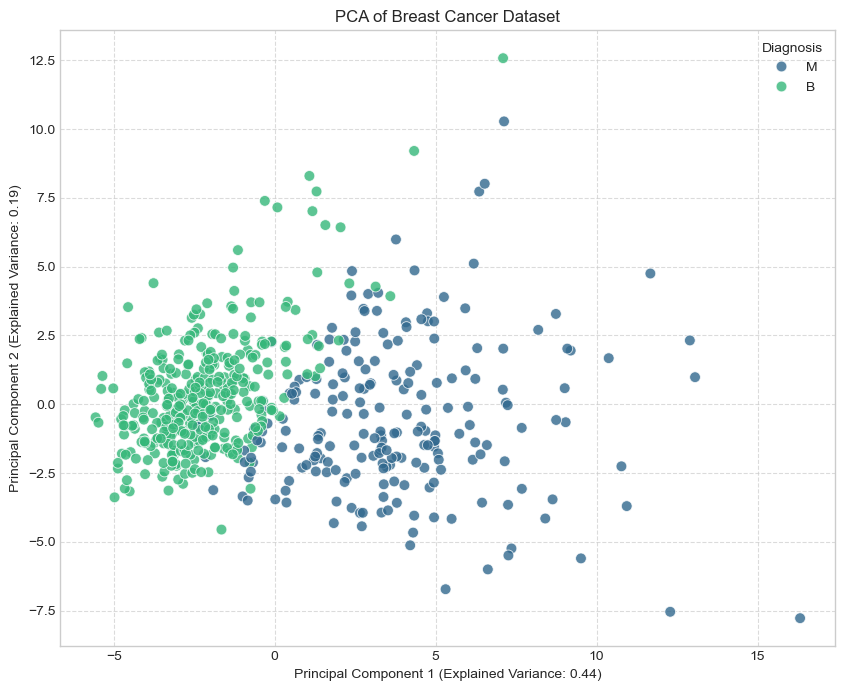

Summary statistics by diagnosis group (first few columns):
diagnosis                      B            M
radius_mean    count  357.000000   212.000000
               mean    12.146524    17.462830
               std      1.780512     3.203971
               min      6.981000    10.950000
               25%     11.080000    15.075000
               50%     12.200000    17.325000
               75%     13.370000    19.590000
               max     17.850000    28.110000
texture_mean   count  357.000000   212.000000
               mean    17.914762    21.604906
               std      3.995125     3.779470
               min      9.710000    10.380000
               25%     15.150000    19.327500
               50%     17.390000    21.460000
               75%     19.760000    23.765000
               max     33.810000    39.280000
perimeter_mean count  357.000000   212.000000
               mean    78.075406   115.365377
               std     11.807438    21.854653
               min   

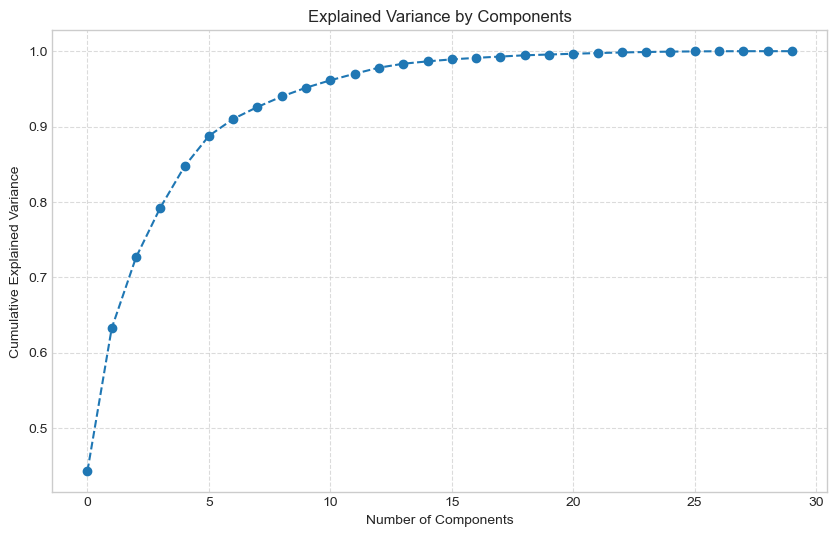

Additional analysis completed. PCA shows good separation between malignant and benign cases.


In [20]:
# Let's perform more detailed analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv("./Documents/breast-cancer.csv")

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Pair plot for selected features to visualize relationships
# Select a subset of features to avoid overcrowding
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
plt.figure(figsize=(12, 10))
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 2. Calculate and visualize feature importance based on correlation with diagnosis
# First, convert diagnosis to numeric (M=1, B=0)
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate correlation with diagnosis
correlation_with_diagnosis = df.drop(['id', 'diagnosis'], axis=1).corrwith(df['diagnosis_numeric'])
correlation_with_diagnosis = correlation_with_diagnosis.sort_values(ascending=False)

# Plot correlation with diagnosis
plt.figure(figsize=(12, 8))
correlation_with_diagnosis.plot(kind='bar', color='teal')
plt.title('Correlation of Features with Diagnosis')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. PCA to visualize data in 2D
# Standardize the features
X = df.drop(['id', 'diagnosis', 'diagnosis_numeric'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['diagnosis'] = df['diagnosis']

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=principal_df, palette='viridis', s=60, alpha=0.8)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Diagnosis')
plt.show()

# 4. Summary statistics by diagnosis group
summary_by_diagnosis = df.groupby('diagnosis').describe()
print("\
Summary statistics by diagnosis group (first few columns):")
print(summary_by_diagnosis[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].transpose())

# 5. Calculate the variance explained by each principal component
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Additional analysis completed. PCA shows good separation between malignant and benign cases.")